<a href="https://colab.research.google.com/github/pydevcasts/MLHub/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
     

digits = datasets.load_digits()


In [131]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

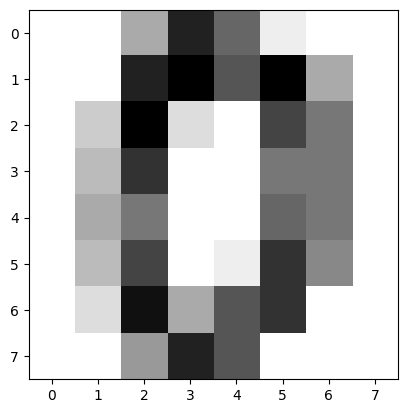

In [2]:
plt.imshow(digits.images[0], cmap="binary")

In [ ]:
digits.target.shape

# digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

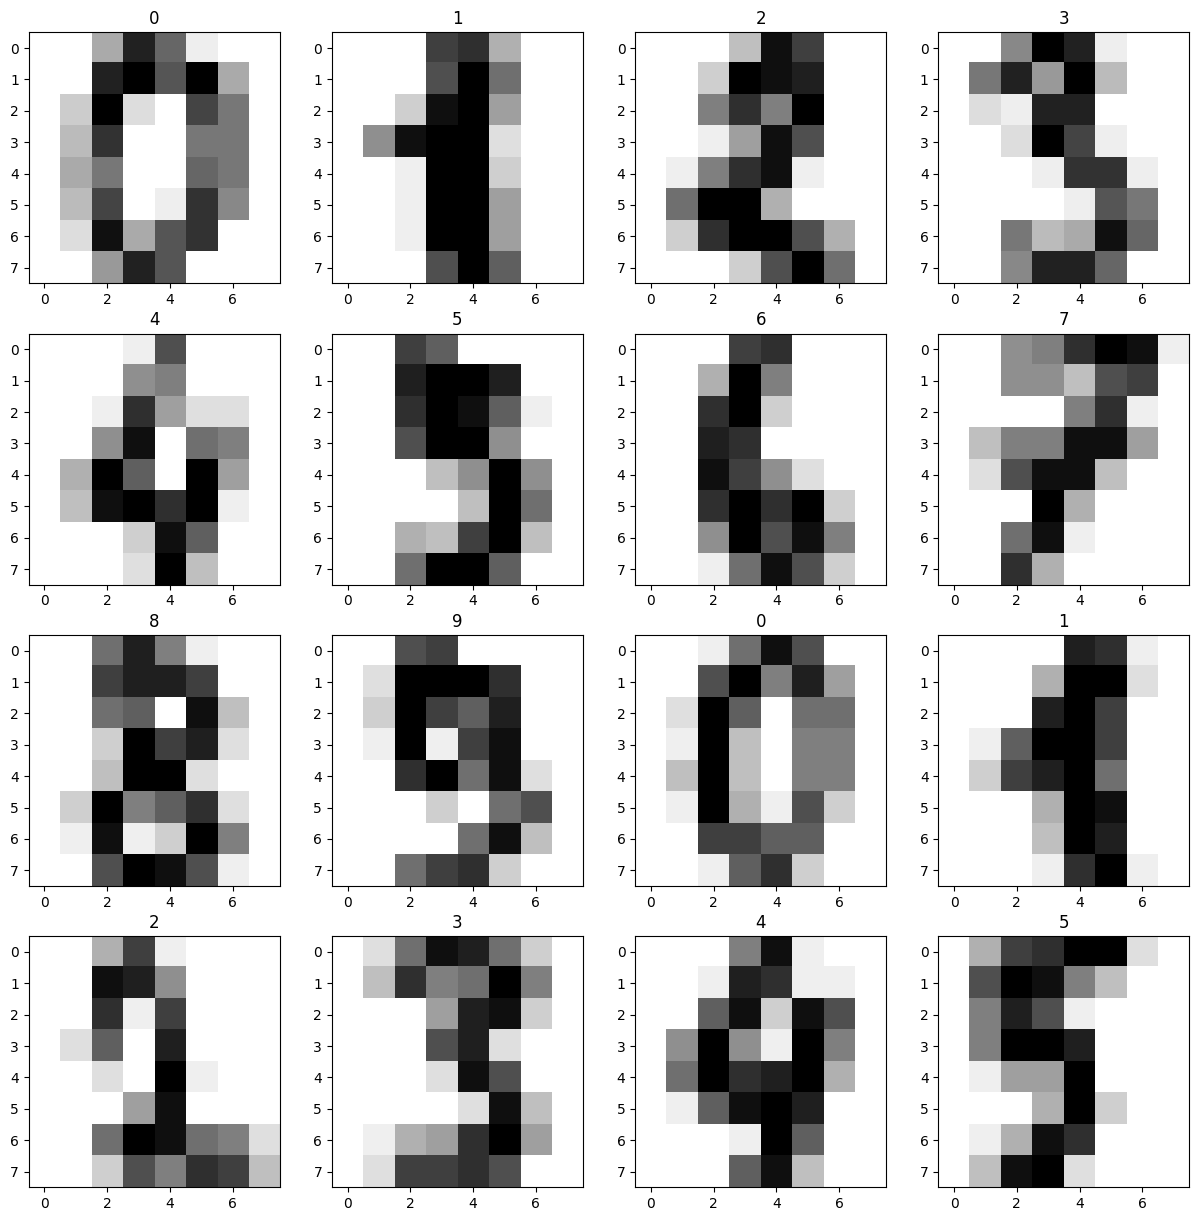

In [133]:
def plot_multi():
    fig = plt.figure(figsize=(15,15))
    for j in range(16):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[j], cmap="binary")
        plt.title(digits.target[j])
    plt.show()

plot_multi()

In [134]:
y = digits.target
x= digits.images.reshape(len(digits.images), -1)
x.shape

(1797, 64)

In [135]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [136]:
from sklearn.neural_network import MLPClassifier  # Importing the MLPClassifier class from scikit-learn's neural network module

# Creating an instance of MLPClassifier with specific configurations
mlp = MLPClassifier(
    hidden_layer_sizes=(15,),         # Defining one hidden layer with 15 neurons
    activation='logistic',             # Using the logistic (sigmoid) activation function
    alpha=1e-4,                        # Setting L2 regularization term to prevent overfitting
    solver='sgd',                      # Using Stochastic Gradient Descent as the optimization algorithm
    tol=1e-4,                          # Tolerance for the optimization to determine convergence
    random_state=1,                    # Fixing the random seed for reproducibility
    learning_rate_init=.1,             # Setting the initial learning rate to 0.1
    verbose=True                       # Enabling verbose output to monitor the training process
)

# Fitting the MLPClassifier to the training data
mlp.fit(x_train, y_train)              # Training the model using the training features (x_train) and labels (y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [137]:
prediction = mlp.predict(x_test)
prediction[:10]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

In [138]:
y_test[:10]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)



0.9146800501882058